In [1]:
# example pytorch end to end workflow

import torch
# nn contains all pytorch building blocks for neural nets
from torch import nn
# for visualizations
import matplotlib.pyplot as plt

torch.__version__


'2.1.0+cu121'

In [2]:
# 1. preparing and loading data as tensors

# using linear regression with a known dataset/representation

# creating the known parameters/dataset
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
# X is capital since it's typically a matrix/tensor
# unsqueeze ADDS another dimension to the data - square brackets
X = torch.arange(start, end, step).unsqueeze(dim=1)
# where linear regression - y = mx + b = ax + b, etc
y = weight * X + bias

X[:10], y[:10]





(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# splitting data into training and tests sets - very important
# testing/training is usually an 80% 20% split
train_split = int(0.8 * len(X))
# 40 samples
X_train, y_train = X[:train_split], y[:train_split]
# remaining 10
X_test, y_test = X[train_split:], y[train_split:]



In [4]:

"""
  plots training data, test data, compares predictions
"""
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_lables=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_lables, c="g", s=4, label="Test data")

    if predictions is not None:
      # if perfect, prediction should be on top
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop = {"size": 1})




In [5]:
# Building a pytorch linear regression model...y = weight * X + bias
from torch import nn

# inherits from neural network module. most inherit from that
class LinearRegModel(nn.Module):
  def __init__(self):
    # calls initialize method on parent class
    super().__init__()
    """
    nn.Parameter - explicitly a parameter of the model
    torch.randn(1,) tensor with random values from a std.dev
    requires_grad - tracked for differentation, used for
    gradient descent/backprop
    torch.float = torch.float32 = default torch datatype
    """
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # defining forward fn . x represents input layer data
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias






In [6]:
# pytorch model building essentials
"""
torch.nn - contains all building blocks for computational graphs
torch.nn.Parameter - what parameters should our model try and learn
torch.nn.Module - base class for all neural networks
if it's subclassed, overwrite forward(), this is required
torch.optim - optimizers that help with gradient descent
"""


"\ntorch.nn - contains all building blocks for computational graphs\ntorch.nn.Parameter - what parameters should our model try and learn\ntorch.nn.Module - base class for all neural networks\nif it's subclassed, overwrite forward(), this is required\ntorch.optim - optimizers that help with gradient descent\n"

In [7]:
# Creating a subclass and messing around with the LinearReg model

# set a random seed
torch.manual_seed(42)

# create an instance of the model

model_0 = LinearRegModel()

# look at the parameters
list(model_0.parameters())

# lists the parameters in a more proper way
model_0.state_dict()



OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# making predictions with torch.inference_mode()
# inference_mode makes it
with torch.inference_mode():
  # if model is perfect, the y_preds list should equal y_test
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [9]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

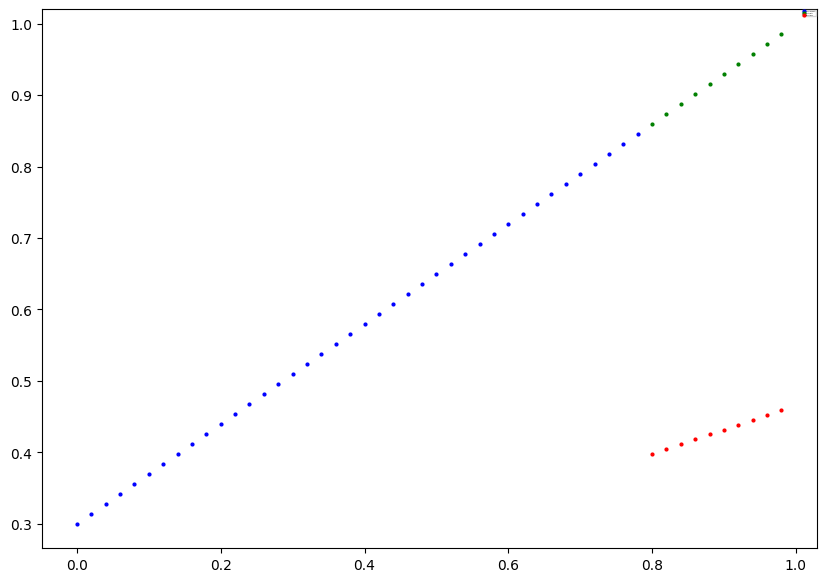

In [10]:
# as of right now, the model isn't too accurate
plot_predictions(predictions=y_preds)

In [82]:
# actually training the model - setting up a loss fn and optimizer

torch.manual_seed(42)
 # L1 Loss fn
loss_fn = nn.L1Loss()

"""
optimizer using stochastic gradient descent
learning rate is like a measure of precision for
how much w and b are updated
"""
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# building a training and testing loop
# loop through the data
# forward pass the data
# calculate loss - compare foward pass predictions to labels
# optimizer zero grad
# Loss backward - move backwards/backprop to calc gradient of each param
# with respect to loss
# Optimizer step - use optimizer to adjust model's parameters(gradient descent)

# an epoch is one loop through the data
# this is a hyperparameter since it's user set
epochs = 100

# loop through the data
for epoch in range(epochs):
  # set the model to training mode.
  # any params that need gradients are set to require_gradient=true
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)

  # calculate the loss between model predictions and ideal training values
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # initialize gradients to zero for each epoch
  optimizer.zero_grad()

  # perform backpropagation w/ respect to parameters
  loss.backward()

  # step the optimizer, always after backprop
  # how the optimizer changes will accumulate through the loop
  optimizer.step()



Loss: 0.04202762991189957
Loss: 0.04167863354086876
Loss: 0.04132963344454765
Loss: 0.04098063334822655
Loss: 0.04063162952661514
Loss: 0.040282636880874634
Loss: 0.039933640509843826
Loss: 0.03958464413881302
Loss: 0.03923564404249191
Loss: 0.03888664394617081
Loss: 0.0385376438498497
Loss: 0.03818932920694351
Loss: 0.03785243630409241
Loss: 0.0375034399330616
Loss: 0.037164121866226196
Loss: 0.03681822493672371
Loss: 0.03647511452436447
Loss: 0.03613303601741791
Loss: 0.03578609973192215
Loss: 0.03544783592224121
Loss: 0.035098835825920105
Loss: 0.03476089984178543
Loss: 0.03441363573074341
Loss: 0.03407188132405281
Loss: 0.03372843936085701
Loss: 0.03338287025690079
Loss: 0.033043231815099716
Loss: 0.03269423171877861
Loss: 0.032357655465602875
Loss: 0.03200903534889221
Loss: 0.03166864812374115
Loss: 0.03132382780313492
Loss: 0.030979642644524574
Loss: 0.030638623982667923
Loss: 0.0302906334400177
Loss: 0.029953425750136375
Loss: 0.02960442565381527
Loss: 0.029265418648719788
Loss:

In [72]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4902])), ('bias', tensor([0.3853]))])

In [83]:
# after training the model multiple times
# and updating weights and biases
with torch.inference_mode():
  y_preds_new = model_0(X_test)



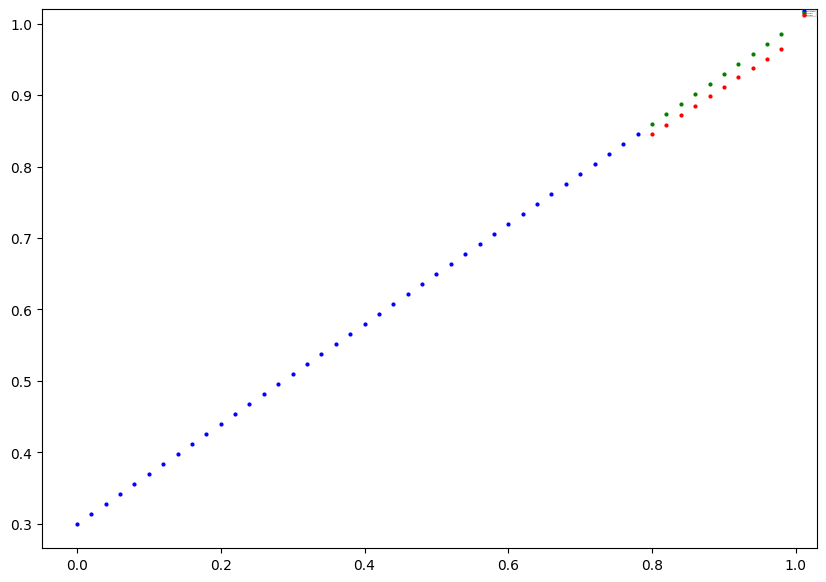

In [84]:
# much more accurate after manually running an epoch a few times
plot_predictions(predictions=y_preds_new)